In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [5]:
# creating database connection
conn = sqlite3.connect("inventory.db")

# fetching ventor summary data
df = pd.read_sql_query('SELECT * from vendor_sales_summary', conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,56438.0,2042275.62,326995.97,103697.33,68601.68,-1768975.98,-86.617887,0.389013,0.535854
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,58348.0,1767472.48,270539.93,107207.47,144929.24,-2036568.74,-115.224919,0.355698,0.464630
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,74167.0,1837730.33,227257.30,136274.10,123780.22,-1580573.35,-86.006816,0.395754,0.537615
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,97191.0,2181160.09,209906.63,178581.04,257032.07,-1080037.85,-49.516670,0.481902,0.668822
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,55817.0,1747693.83,261621.92,102556.98,257032.07,-1275512.18,-72.982588,0.404152,0.578093


### Exploratory Data Analysis

- Previously, we examined the various tables in the database to identify key variables, understand their relationships, and determine which ones should be included in the final analysis.

- In this phase of EDA, we will analyze the resultant table to gain insights into the distribution of each column. This will help us understand data patterns, identify anomalies, and ensure data quality before proceeding with further analysis.

In [7]:
# summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,1.294077e+03,4776.932666,0.00,7.000000,84.000000,742.250000,1.556960e+05
TotalSalesDollars,10692.0,1.746658e+04,68283.393779,0.00,129.937500,1755.030000,11528.065000,2.181160e+06
TotalSalesPrice,10692.0,8.218786e+03,20713.114558,0.00,33.980000,899.805000,6459.165000,3.269960e+05


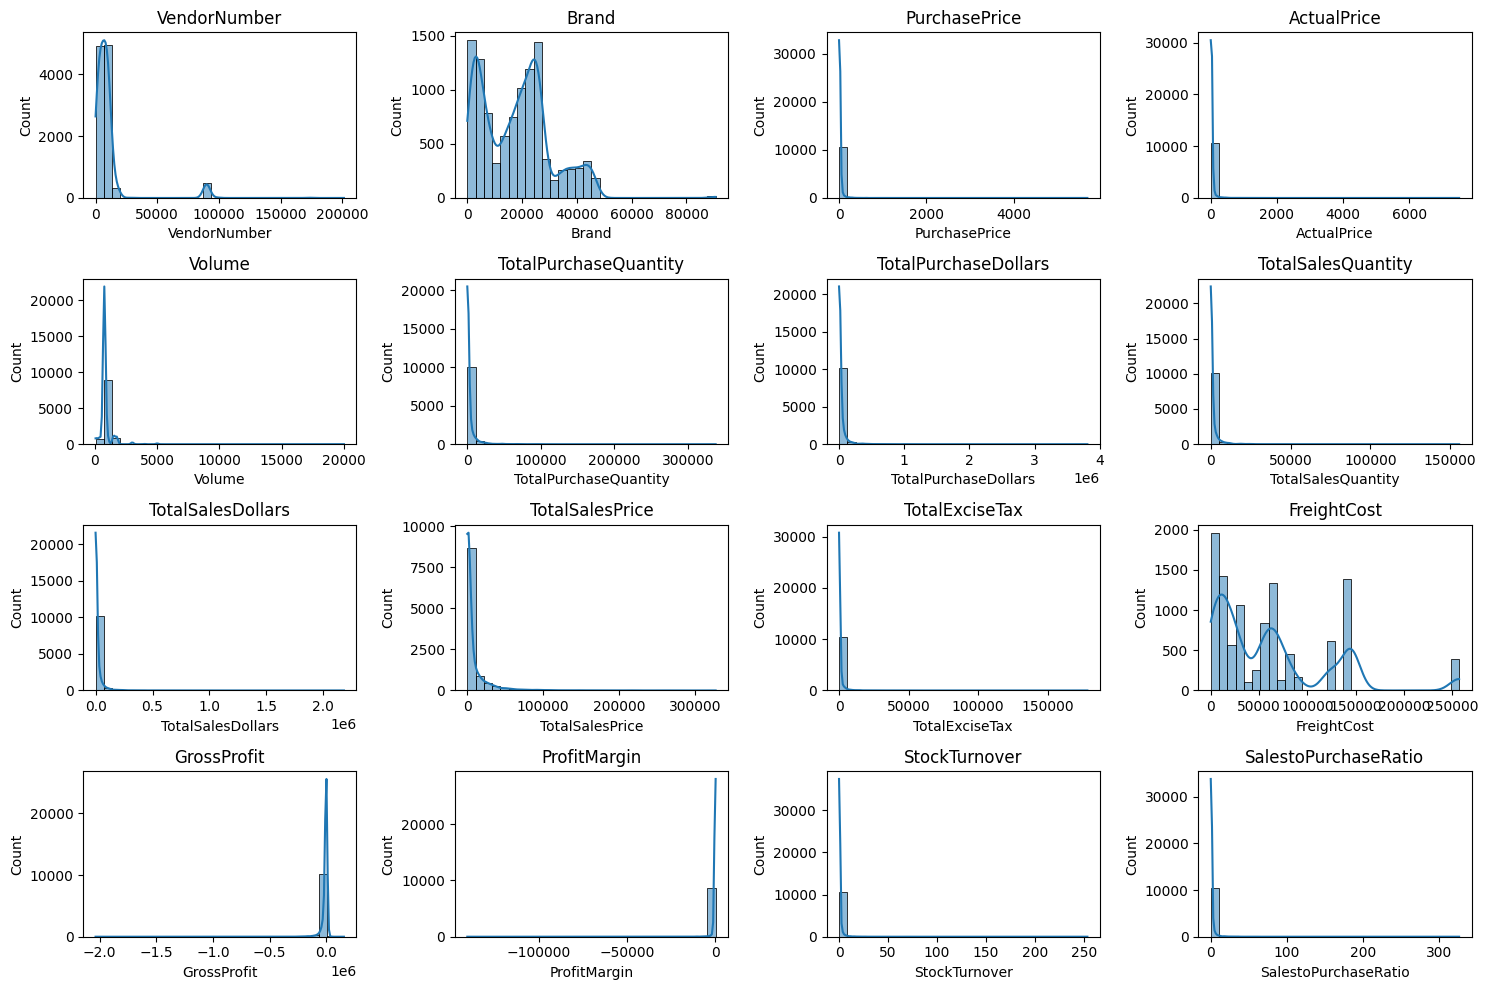

In [9]:
# Distribution Plots for Numerical Columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1) # Adjust grid layout as needed
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

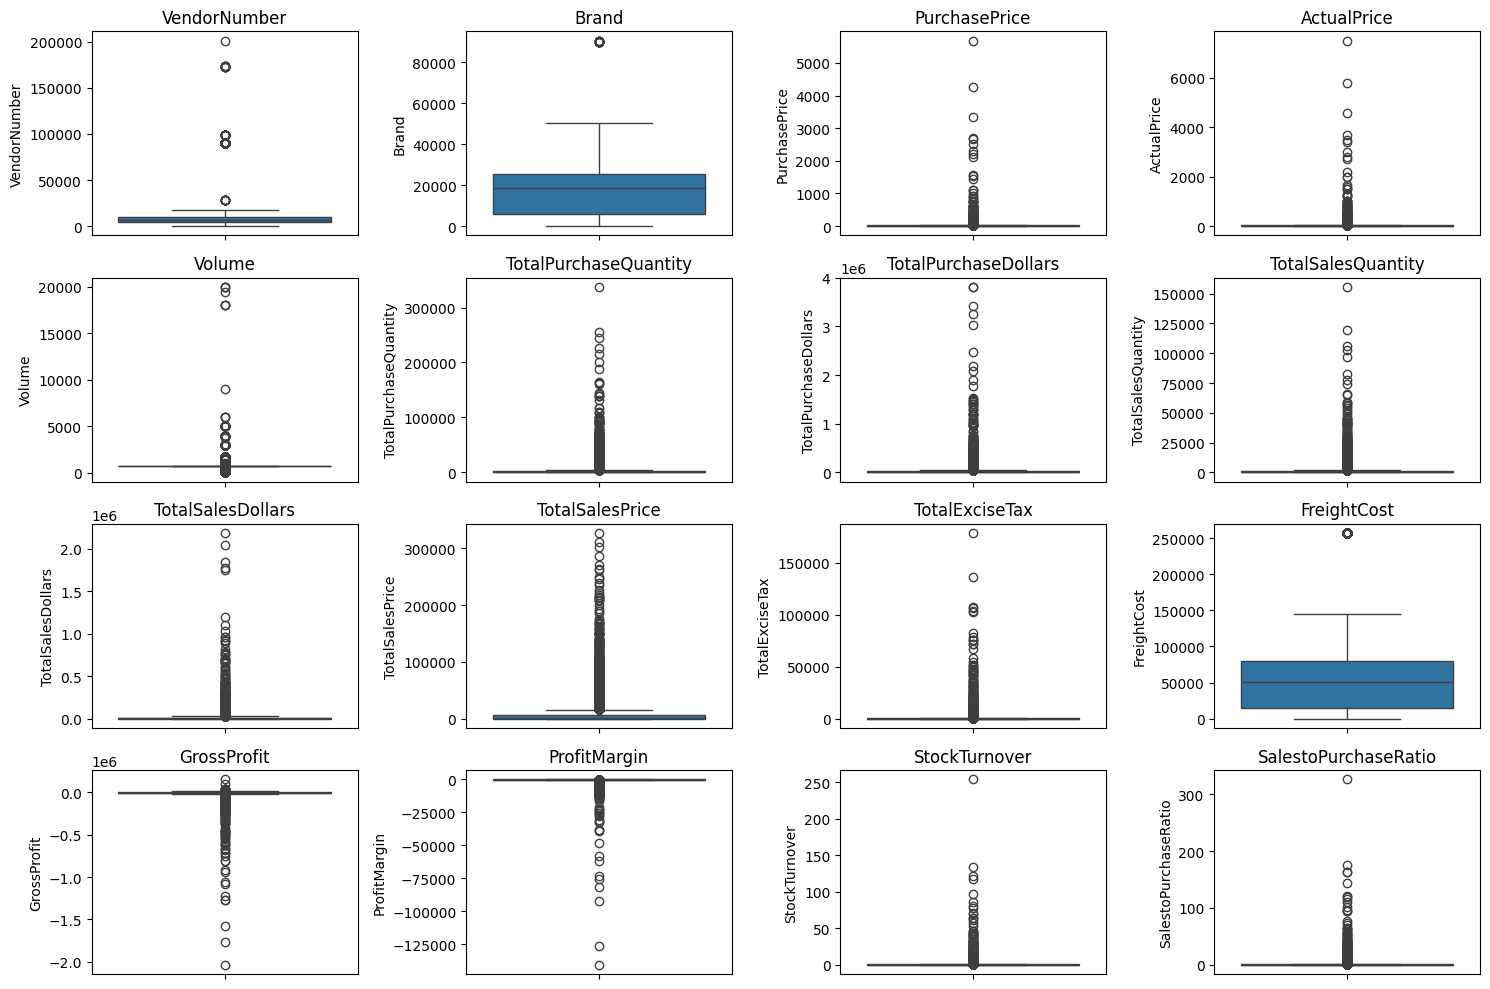

In [10]:
# Outlier Detection with Boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

#### Summary Statistics Insights:

##### Negative & Zero Values:

Gross Profit: Minimum value is -52,002.78, indicating losses. Some products or transactions may be selling at a loss due to high costs or selling at discounts lower than the purchase price.
Profit Margin: Has a minimum of -∞, which suggests cases where revenue is zero or even lower than costs.
Total Sales Quantity & Sales Dollars: Minimum values are 0, meaning some products were purchased but never sold. These could be slow-moving or obsolete stock.
##### Outliers Indicated by High Standard Deviations:

Purchase & Actual Prices: The max values (5,681.81 & 7,499.99) are significantly higher than the mean (24.39 & 35.64), indicating premium products.
Freight Cost: Huge variation, from 0.09 to 257,032.07, suggests logistics inefficiencies or bulk shipments.
Stock Turnover: Ranges from 0 to 274.5, implying some products sell extremely fast while others remain in stock indefinitely. Value more than 1 indicates that Sold quantity for that product is higher than purchased quantity due to either sales are being fulfilled from older stock.

In [11]:
# let's filter the data by removing inconsitencies
df = pd.read_sql_query("""SELECT *
FROM vendor_sales_summary
WHERE GrossProfit > 0
AND ProfitMargin > 0
AND TotalSalesQuantity > 0""", conn)

In [12]:
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,5299,Southern Comfort,15.26,21.99,1750.0,15196,231890.96,14631.0,335960.69,133477.14,26882.88,68601.68,104069.73,30.976758,0.962819,1.448787
1,12546,JIM BEAM BRANDS COMPANY,1476,Jim Beam Traveler,16.05,21.99,1750.0,11569,185682.45,14968.0,340530.32,91128.88,27500.65,123880.97,154847.87,45.472565,1.293802,1.833939
2,3960,DIAGEO NORTH AMERICA INC,4089,Capt Morgan White,14.59,22.99,1750.0,8118,118441.62,5750.0,123757.50,75621.08,10566.95,257032.07,5315.88,4.295400,0.708303,1.044882
3,10754,PERFECTA WINES,18743,Ca'Momi Merlot Napa Valley,6.80,9.99,750.0,16616,112988.80,12527.0,125144.73,33406.56,1403.96,28720.52,12155.93,9.713497,0.753912,1.107585
4,480,BACARDI USA INC,8358,Bacardi 151 Proof,14.49,19.99,750.0,7071,102458.79,6219.0,124317.81,71464.25,4898.71,89286.27,21859.02,17.583177,0.879508,1.213345


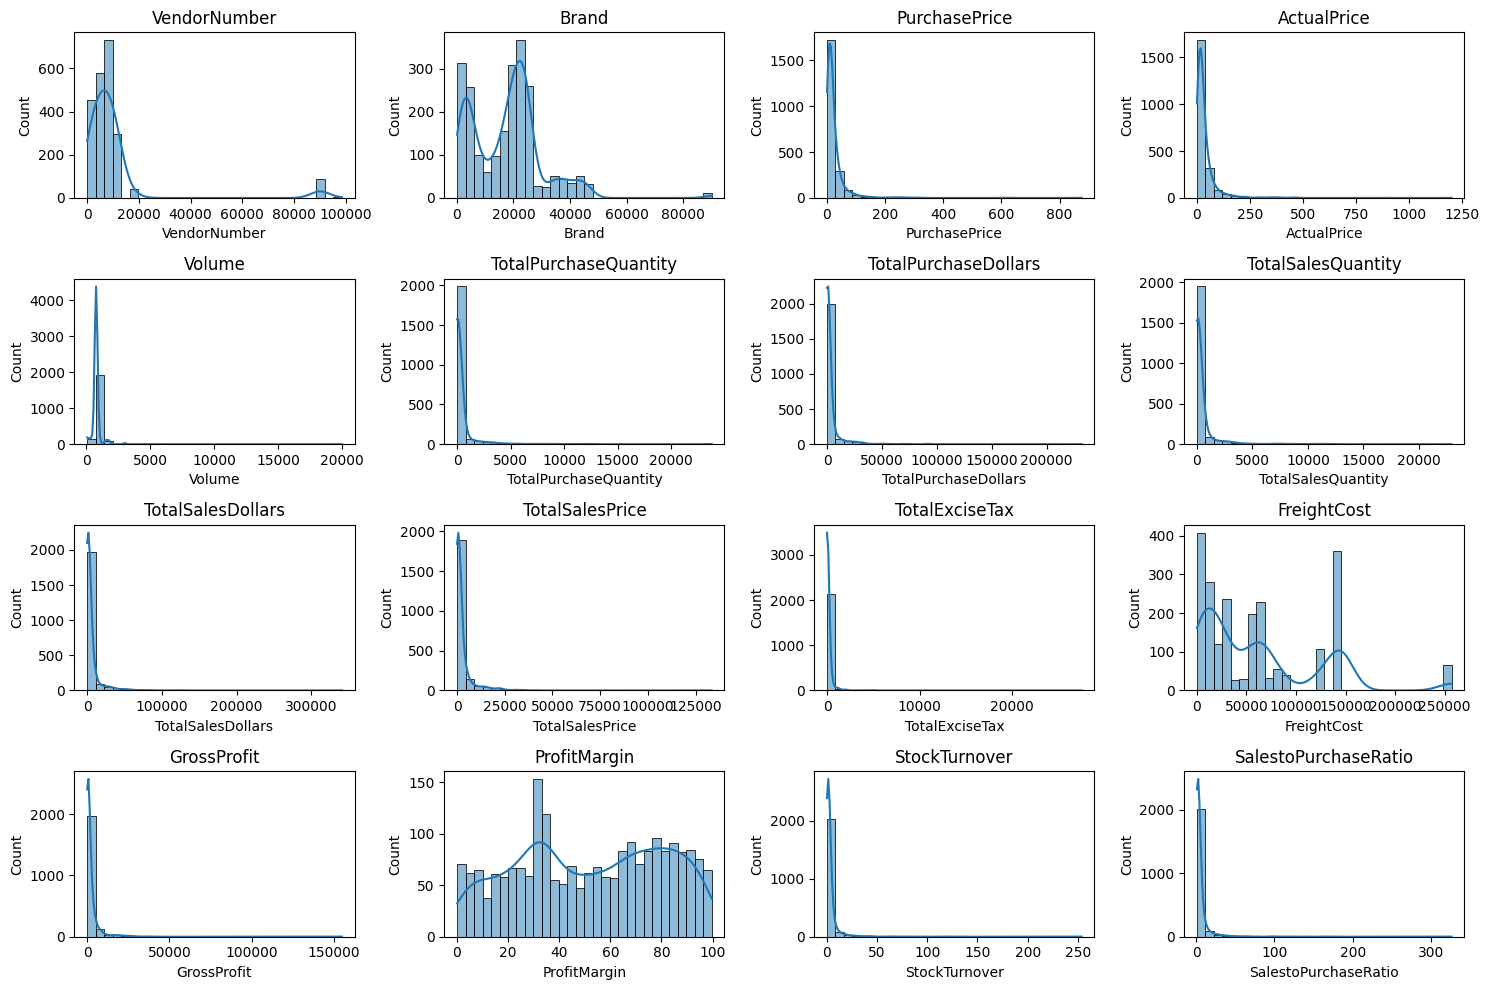

In [13]:
# Again using distribution plot, we plot the data after removing inconsistencies
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1) # Adjust grid layout as needed
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

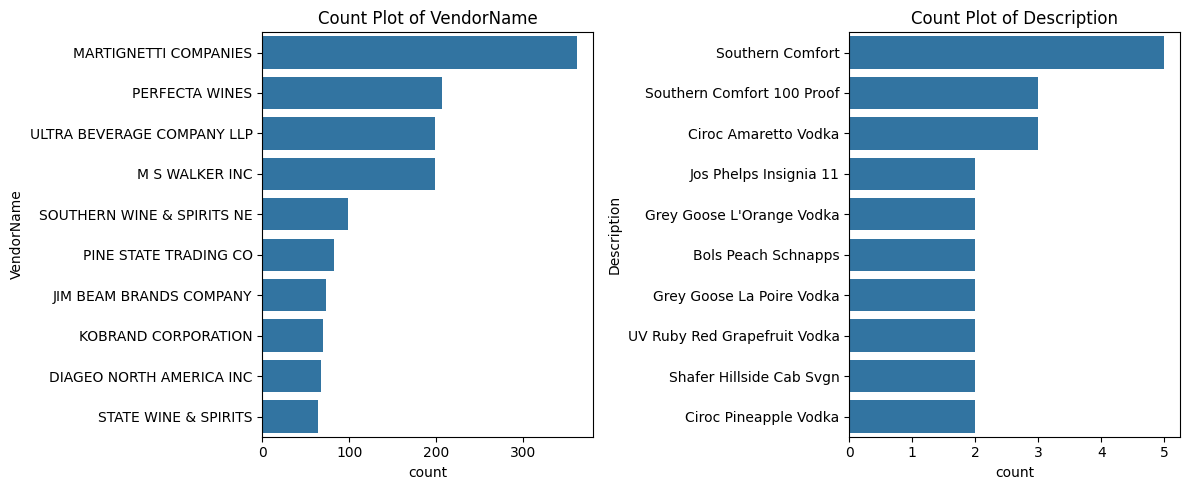

In [14]:
# Count Plots for Categorical Columns
categorical_cols = ["VendorName", "Description"]

plt.figure(figsize=(12, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10]) # Top 10 categories
    plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()

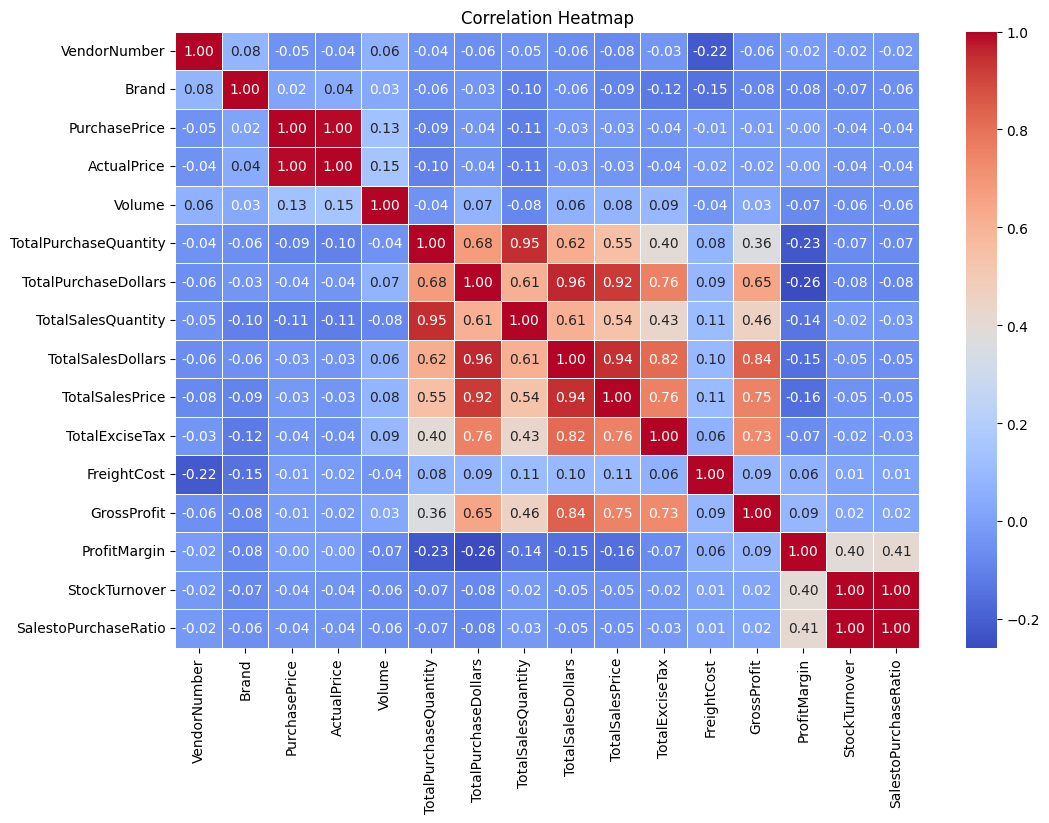

In [16]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

#### Correlation Insights

- PurchasePrice has weak correlations with TotalSalesDollars (-0.012) and GrossProfit (-0.016), suggesting that price variations do not significantly impact sales revenue or profit.
- Strong correlation between total purchase quantity and total sales quantity (0.999), confirming efficient inventory turnover.
- Negative correlation between profit margin & total sales price (-0.179) suggests that as sales price increases, margins decrease, possibly due to competitive pricing pressures.
- StockTurnover has weak negative correlations with both GrossProfit (-0.038) and ProfitMargin (-0.055), indicating that faster turnover does not necessarily result in higher profitability.

### Data Analysis
##### Identify the brands that needs the promotional or pricing adjustments which exhibit lower sales performance but higher profit margins.

In [17]:
brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars':'sum',
    'ProfitMargin':'mean'}).reset_index()

In [19]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [20]:
low_sales_threshold

np.float64(239.922)

In [21]:
high_margin_threshold

np.float64(85.31274434735255)

In [22]:
# Filter brands with low sales but high profit margins
target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
    (brand_performance['ProfitMargin'] >= high_margin_threshold)
]
print("Brands with Low Sales but High Profit Margins:")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with Low Sales but High Profit Margins:


,Description,TotalSalesDollars,ProfitMargin
689,Crown Royal Apple,23.88,88.107203
2001,Tracia Syrah,44.94,88.495772
784,Dr McGillicuddy's Apple Pie,62.72,96.269133
1717,Sauza Sparkling Margarita,62.91,91.448100
1945,The Club Strawbry Margarita,69.65,97.889447
1590,Promesses de France CdRhone,71.91,92.337644
1944,The Club Mudslide,83.58,91.325676
1968,Three Olives Grape Vodka,85.14,99.166079
93,Aresti Pnt Nr Curico Vly,89.82,96.348252
2071,Vigna Magana Dignus,119.94,88.736035


In [23]:
brand_performance = brand_performance[brand_performance['TotalSalesDollars']<10000]

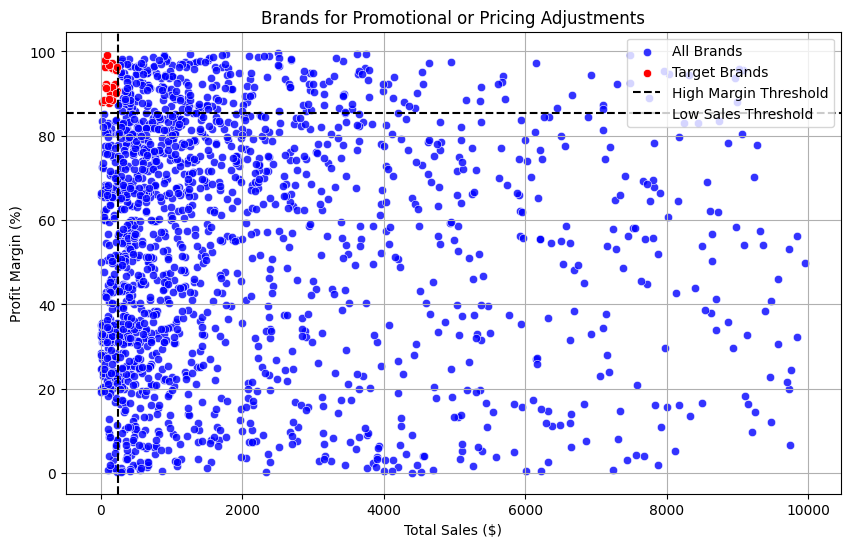

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=brand_performance, x='TotalSalesDollars', y='ProfitMargin', color='blue', label="All Brands", alpha=0.8)
sns.scatterplot(data=target_brands, x='TotalSalesDollars', y='ProfitMargin', color='red', label="Target Brands")

plt.axhline(high_margin_threshold, linestyle='--', color='black', label="High Margin Threshold")
plt.axvline(low_sales_threshold, linestyle='--', color='black', label="Low Sales Threshold")

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()

### Which vendors and brands demonstrate highest sales performance?

In [25]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.2f}K"
    else:
        return str(value)

In [26]:
# Top Vendors & Brands by Sales Performance
top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)
top_vendors

VendorName
MARTIGNETTI COMPANIES         2365288.57
ULTRA BEVERAGE COMPANY LLP    1495687.89
BROWN-FORMAN CORP              994574.24
JIM BEAM BRANDS COMPANY        760450.88
PERFECTA WINES                 723564.15
DIAGEO NORTH AMERICA INC       596493.47
M S WALKER INC                 563933.70
BACARDI USA INC                403558.96
KOBRAND CORPORATION            347904.34
SOUTHERN WINE & SPIRITS NE     300489.02
Name: TotalSalesDollars, dtype: float64

In [27]:
top_brands

Description
Southern Comfort                581004.13
Jim Beam Traveler               340530.32
Southern Comfort 100 Proof      125978.94
Ca'Momi Merlot Napa Valley      125144.73
Bacardi 151 Proof               124317.81
Capt Morgan White               123757.50
Sebastiani Znfdl Sonoma Cnty    112537.35
Carpineto Dogajolo Tuscan Rd    100106.86
Jack Daniels & Coke              99936.46
Cecchi Sangiovese                92218.98
Name: TotalSalesDollars, dtype: float64

In [28]:
top_brands.apply(lambda x : format_dollars(x))

Description
Southern Comfort                581.00K
Jim Beam Traveler               340.53K
Southern Comfort 100 Proof      125.98K
Ca'Momi Merlot Napa Valley      125.14K
Bacardi 151 Proof               124.32K
Capt Morgan White               123.76K
Sebastiani Znfdl Sonoma Cnty    112.54K
Carpineto Dogajolo Tuscan Rd    100.11K
Jack Daniels & Coke              99.94K
Cecchi Sangiovese                92.22K
Name: TotalSalesDollars, dtype: object

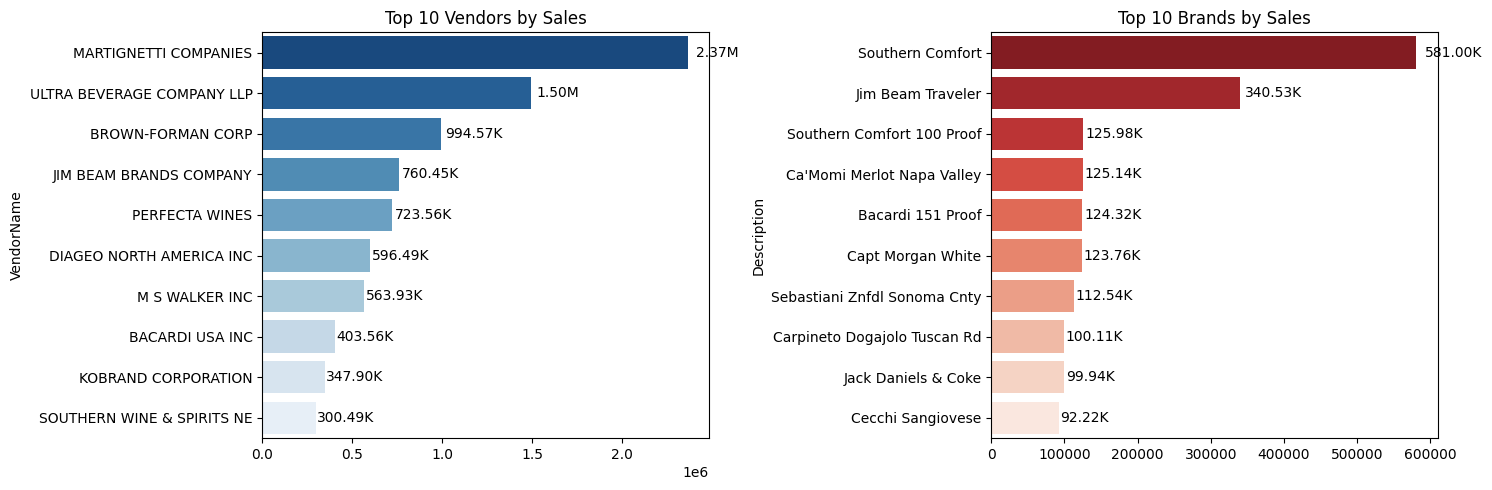

In [29]:
plt.figure(figsize=(15, 5))

# Plot for Top Vendors
plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')

# Plot for Top Brands
plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette="Reds_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

### Which vendors contribute most to the total purchase dollars?

In [32]:
vendor_performance = df.groupby("VendorName").agg({
    'TotalPurchaseDollars':'sum',
    'GrossProfit':'sum',
    'TotalSalesDollars':'sum'
}).reset_index()

In [33]:
vendor_performance['TotalContribution%'] = vendor_performance['TotalPurchaseDollars'] / vendor_performance['TotalPurchaseDollars'].sum()

In [35]:
vendor_performance = round(vendor_performance.sort_values("TotalContribution%", ascending = False),2)

In [36]:
# Display Top 10 Vendors
top_vendors = vendor_performance.head(10)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,TotalContribution%
39,MARTIGNETTI COMPANIES,1.43M,939.59K,2.37M,0.20
78,ULTRA BEVERAGE COMPANY LLP,912.97K,582.72K,1.50M,0.13
6,BROWN-FORMAN CORP,703.09K,291.49K,994.57K,0.10
49,PERFECTA WINES,479.74K,243.82K,723.56K,0.07
29,JIM BEAM BRANDS COMPANY,429.33K,331.12K,760.45K,0.06
15,DIAGEO NORTH AMERICA INC,415.23K,181.26K,596.49K,0.06
36,M S WALKER INC,251.27K,312.67K,563.93K,0.03
31,KOBRAND CORPORATION,239.98K,107.92K,347.90K,0.03
2,BACARDI USA INC,194.22K,209.34K,403.56K,0.03
10,CONSTELLATION BRANDS INC,193.28K,91.38K,284.66K,0.03


In [40]:
top_vendors['cumulativeContribution%'] = top_vendors['TotalContribution%'].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,TotalContribution%,cumulativeContribution%
39,MARTIGNETTI COMPANIES,1.43M,939.59K,2.37M,0.20,0.20
78,ULTRA BEVERAGE COMPANY LLP,912.97K,582.72K,1.50M,0.13,0.33
6,BROWN-FORMAN CORP,703.09K,291.49K,994.57K,0.10,0.43
49,PERFECTA WINES,479.74K,243.82K,723.56K,0.07,0.50
29,JIM BEAM BRANDS COMPANY,429.33K,331.12K,760.45K,0.06,0.56
15,DIAGEO NORTH AMERICA INC,415.23K,181.26K,596.49K,0.06,0.62
36,M S WALKER INC,251.27K,312.67K,563.93K,0.03,0.65
31,KOBRAND CORPORATION,239.98K,107.92K,347.90K,0.03,0.68
2,BACARDI USA INC,194.22K,209.34K,403.56K,0.03,0.71
10,CONSTELLATION BRANDS INC,193.28K,91.38K,284.66K,0.03,0.74


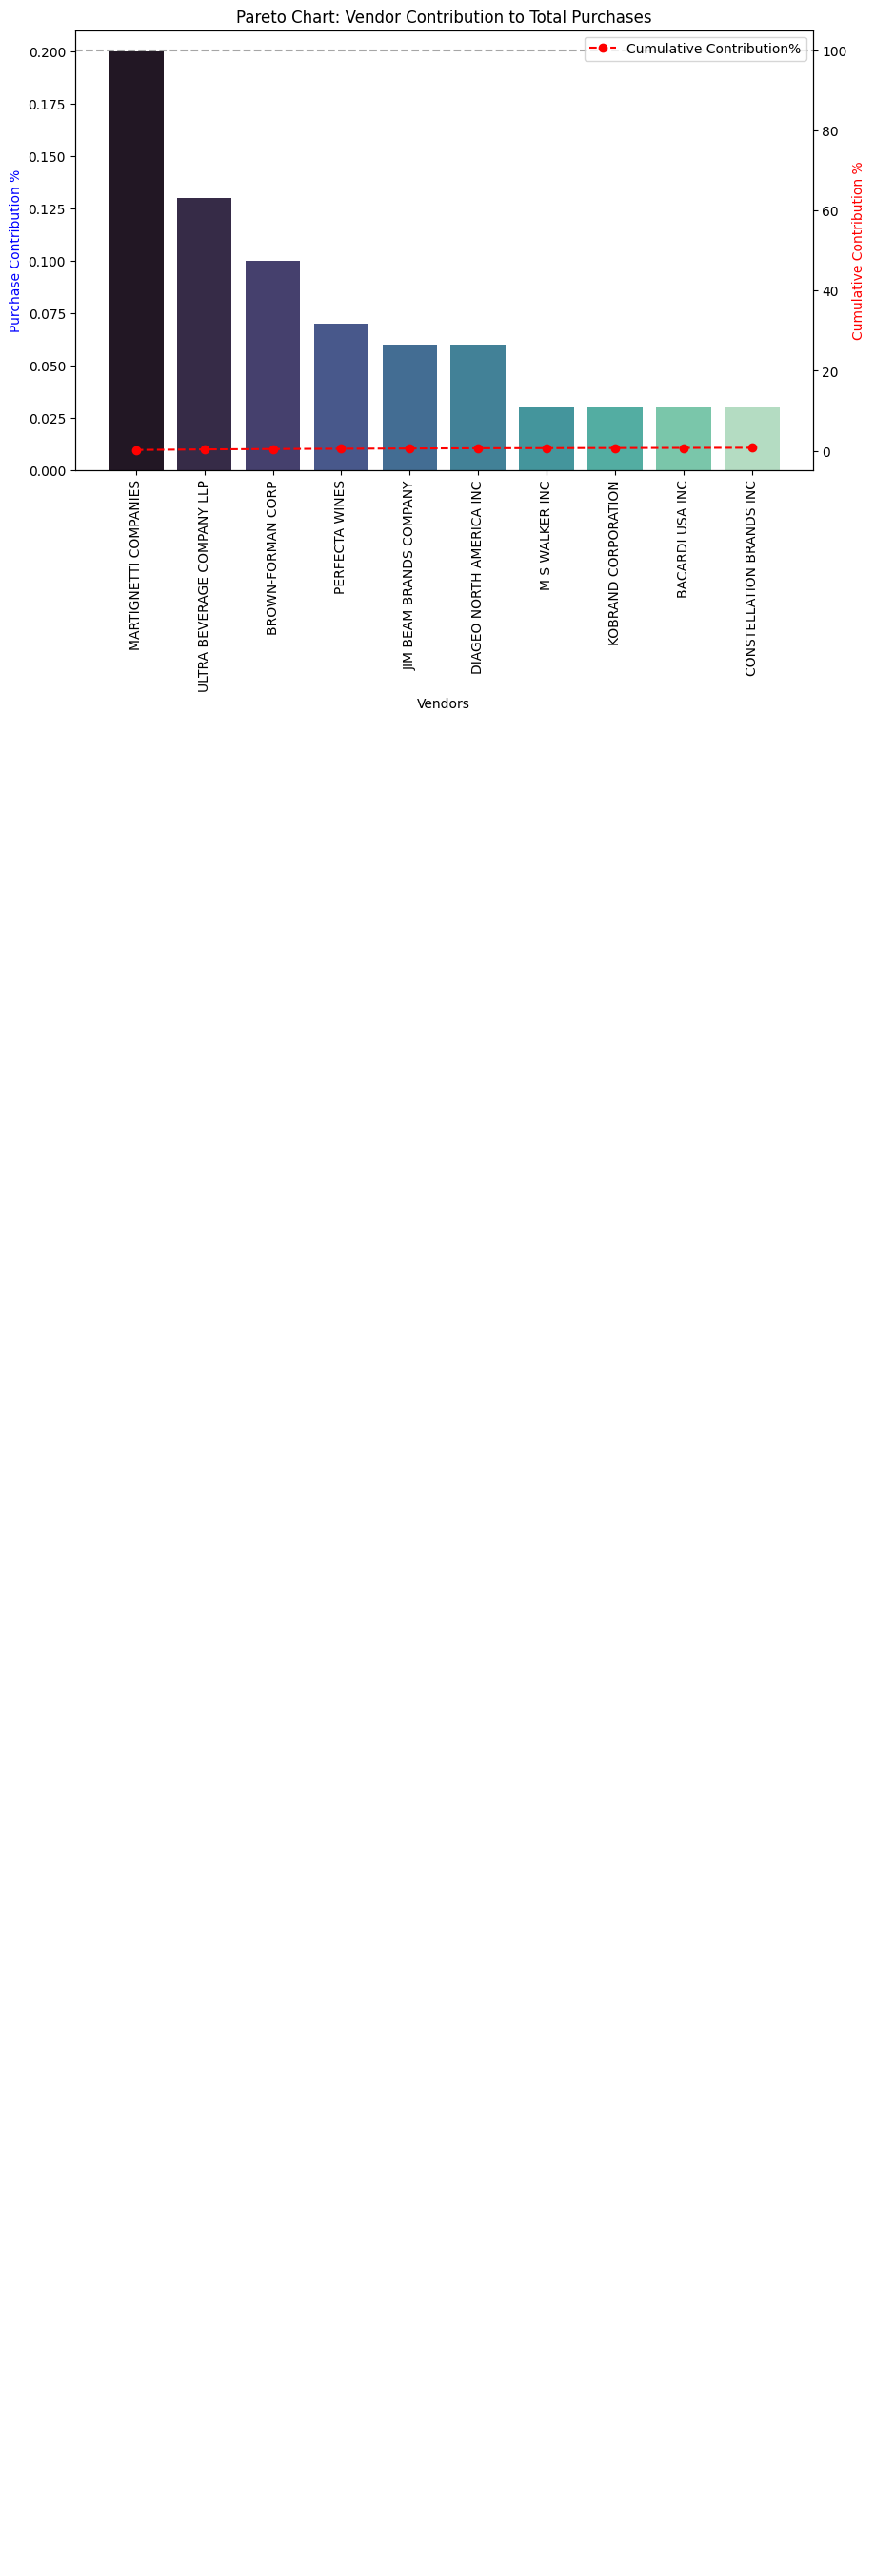

In [74]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Purchase Contribution
sns.barplot(x=top_vendors['VendorName'], y=top_vendors['TotalContribution%'], palette='mako', ax=ax1)

for i, value in enumerate(top_vendors['TotalContribution%']):
    ax1.text(i, value - 1, str(value) + '%', ha='center', fontsize=10, color='white')

# Line Plot for Cumulative Contribution
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['cumulativeContribution%'], color='red', marker='o', linestyle='dashed', label='Cumulative Contribution%')

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.show()

### How much of total procurement is dependent on top vendors?

In [57]:
print(f"Total Purchase Contribution of Top 10 vendors is {round(top_vendors['TotalContribution%'].sum(), 2)} %")

Total Purchase Contribution of Top 10 vendors is 0.74 %


Text(0, 0, 'Top 10 Total\nContribution: 74.00%')

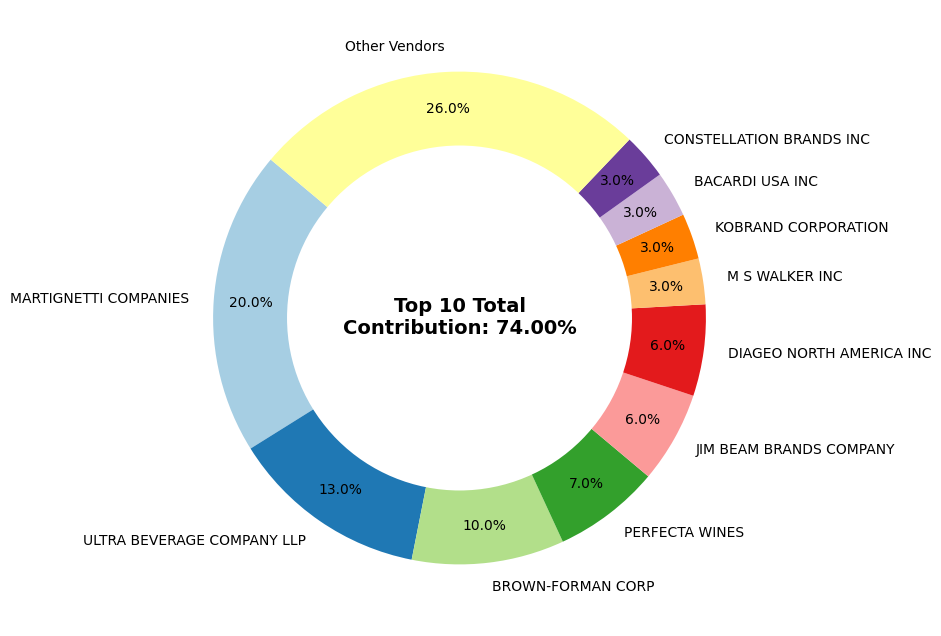

In [66]:
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['TotalContribution%'].values)
total_contribution = sum(purchase_contributions)
remaining_contribution = 1 - total_contribution

# Append "Other Vendors" category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# Donut Chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(purchase_contributions, labels=vendors, autopct='%1.1f%%',
                                  startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors)

# Draw a white circle in the center to create a "donut" effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add Total Contribution annotation in the center
plt.text(0, 0, f"Top 10 Total\nContribution: {total_contribution*100:.2f}%", fontsize=14, fontweight='bold', ha='center', va='center')

### Does Purchasing in bulk reduce the unit price, and what is optimal purchase valume for the cost savings?

In [67]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars'] / df['TotalPurchaseQuantity']

In [68]:
df['OrderSize'] = pd.qcut(df['TotalPurchaseQuantity'], q = 3, labels = ['Small', 'Medium', 'Large'])

In [70]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,37.830090
Medium,22.857658
Large,12.650274


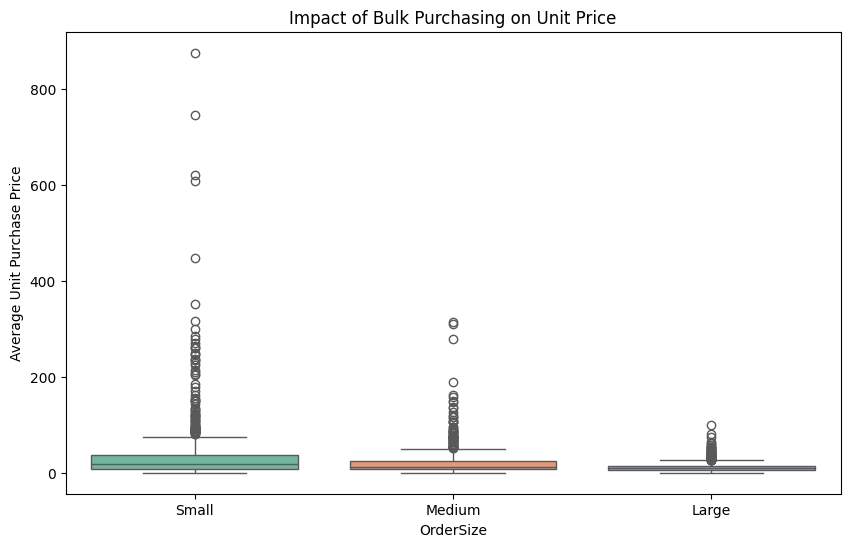

In [76]:
plt.figure(figsize=(10, 6))
sns.boxplot(data = df, x = 'OrderSize', y = 'UnitPurchasePrice', palette = "Set2")
plt.title("Impact of Bulk Purchasing on Unit Price")
plt.xlabel("OrderSize")
plt.ylabel("Average Unit Purchase Price")
plt.show()

- Vendors buying in bulk (Large Order Size) get the lowest unit price ($10.78 per unit), meaning higher margins if they can manage inventory efficiently.
- The price difference between Small and Large orders is substantial (-72% reduction in unit cost)
- This suggests that bulk pricing strategies successfully encourage vendors to purchase in larger volumes, leading to higher overall sales despite lower per-unit revenue."

### Which vendors have low inventory turnover indicating excess stocks and slow-moving products? 

In [80]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover', ascending = True).head

,StockTurnover
VendorName,
WINE GROUP INC,0.511425
THE IMPORTED GRAPE LLC,0.544246
ALISA CARR BEVERAGES,0.666667
SHAW ROSS INT L IMP LTD,0.666667
STELLAR IMPORTING CO LLC,0.666667
SURVILLE ENTERPRISES CORP,0.676923
PERNOD RICARD USA,0.690450
PSP WINES,0.692167
FORTUNE WINE BROKERS LLC,0.694444


### What is 95% confidence intervals for profit margins of top-performing and low performning vendors

In [93]:
top_threshold = df['TotalSalesDollars'].quantile(0.75)
low_threshold = df['TotalSalesDollars'].quantile(0.25)

In [94]:
top_vendors = df[df['TotalSalesDollars']>=top_threshold]['ProfitMargin'].dropna()
low_vendors = df[df['TotalSalesDollars']<=top_threshold]['ProfitMargin'].dropna()

In [95]:
top_vendors 

0       30.976758
1       45.472565
2        4.295400
3        9.713497
4       17.583177
          ...    
1419    98.133345
1513    97.167348
1640    97.200809
1662    97.495934
1890    99.139951
Name: ProfitMargin, Length: 548, dtype: float64

In [96]:
low_vendors

321      1.518636
324      0.468722
328      3.152266
329      0.552350
330      6.623446
          ...    
2187    88.107203
2188    83.448276
2189    96.269133
2190    97.889447
2191    99.166079
Name: ProfitMargin, Length: 1644, dtype: float64

In [99]:
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data)) # Standard error
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error

Top Vendors 95% CI: (41.70, 46.48), Mean: 44.09
Low Vendors 95% CI: (53.18, 55.90), Mean: 54.54


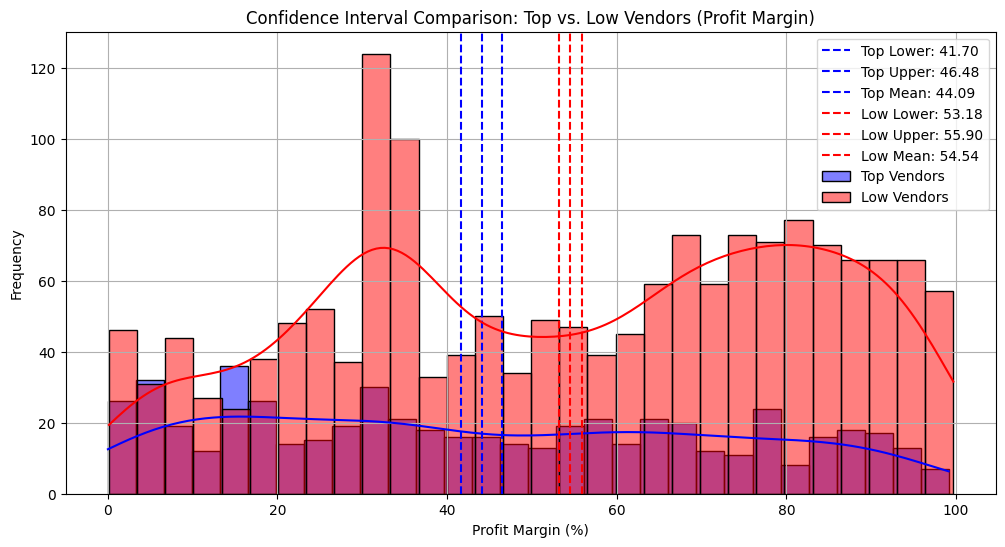

In [100]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

plt.figure(figsize=(12, 6))

# Top Vendors Plot
sns.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="--", label=f"Top Mean: {top_mean:.2f}")

# Low Vendors Plot
sns.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="--", label=f"Low Mean: {low_mean:.2f}")

# Finalize Plot
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

- The confidence interval for low-performing vendors (40.48% to 42.62%) is significantly higher than that of top-performing vendors (30.74% to 31.81%).
- This suggests that vendors with lower sales tend to maintain higher profit margins, potentially due to premium pricing or lower operational costs.
- For High-Performing Vendors: If they aim to improve profitability, they could explore selective price adjustments, cost optimization, or bundling strategies.
- For Low-Performing Vendors: Despite higher margins, their low sales volume might indicate a need for better marketing, competitive pricing, or improved distribution strategies.

### Is there a significant difference in profit margins between top-performing and low-performing vendors?
Hypothesis:

H₀ (Null Hypothesis): There is no significant difference in the mean profit margins of top-performing and low-performing vendors.

H₁ (Alternative Hypothesis): The The mean profit margins of top-performing and low-performing vendors are significantly different."


In [101]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

# Perform Two-Sample T-Test
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

# Print results
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject H₀: There is a significant difference in profit margins between top and low-performing vendors.")
else:
    print("Fail to Reject H₀: No significant difference in profit margins.")

T-Statistic: -2.3727, P-Value: 0.0178
Reject H₀: There is a significant difference in profit margins between top and low-performing vendors.
